Convolutional Neural Networks
================

------
**Deep Learning for Computer Vision**<br>
(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr/
-----

### About this notebook

- **Objectives**:
  - Train your first convolutional neural network using Tensorflow and Keras
  

- **Instructions**:
  - To make the best use of this notebook, read the provided instructions and code, fill in the *#TODO* blocks, and run the code.
  - Load Cats & Dogs datasets from https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1
  

Import libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [ ]:
import tensorflow as tf

Check version of Tensorflow. Version should be >= 2.0.

In [ ]:
tf.__version__

'2.17.1'

### Load MNIST dataset

In [ ]:
path = '/content/' #TO ADAPT IF NEEDED
f = gzip.open(path+'mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
f.close()

#%% Shuffle the data and define the data variables
X_train,y_train = train_set
X_test,y_test = test_set

inds=np.arange(0,X_train.shape[0])
np.random.shuffle(inds)
X_train,y_train = X_train[inds],y_train[inds]

inds=np.arange(0,X_test.shape[0])
np.random.shuffle(inds)
X_test,y_test = X_test[inds],y_test[inds]

print(X_train.shape)
print(X_test.shape)

(50000, 784)
(10000, 784)


### Tensorflow model corresponding to a 2-layer neural network

Create the model using the high-level library Keras:

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu',input_shape=(784,)) )
model.add(tf.keras.layers.Dense(10, activation='softmax') )

Print a description of the model:

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Verify by hand that the indicated number of parameters is exact.

Add a loss and define the training parameters:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Ground truth provided as class IDs
              metrics=['accuracy'])


Perform the training:

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8656 - loss: 0.4693
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9623 - loss: 0.1325
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0869
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9817 - loss: 0.0624
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0492


Evaluate the model on the test set:

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0797


[0.07973073422908783, 0.977400004863739]

Increase the number of hidden nodes to 128 and retrain the model. What do you conclude? --> *+5% accuracy, loss is lower too*

### Use Images as input

Reshape the data:

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


Use the flattening layer, which linearizes the input, to provide the images directly to the same model:

In [ ]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(28, 28,1)) )
model.add( tf.keras.layers.Dense(64, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model:

In [ ]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8462 - loss: 0.5504
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9493 - loss: 0.1675
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1166
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9729 - loss: 0.0891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0708


Plot the training accuracy:

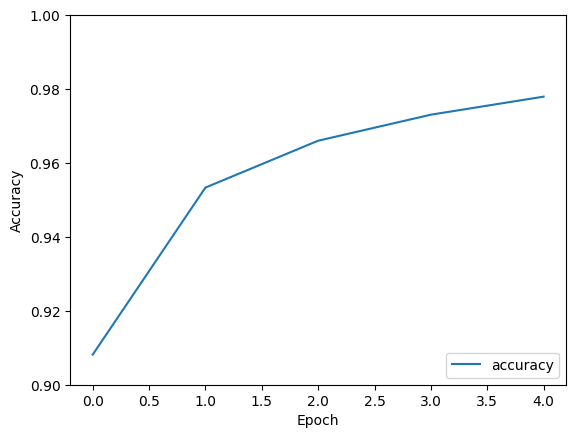

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

Evalute the model on the test set:

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)


313/313 - 1s - 2ms/step - accuracy: 0.9724 - loss: 0.0921


[0.09208664298057556, 0.9724000096321106]

### Use a Convolutional Neural Network:

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28,28,1) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │          38,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,146 (160.73 KB)

 Trainable params: 41,146 (160.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8722 - loss: 0.4253
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9750 - loss: 0.0803
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9837 - loss: 0.0531
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9873 - loss: 0.0404
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9900 - loss: 0.0313


In [ ]:
model.evaluate(X_test,  y_test, verbose=2)


313/313 - 2s - 5ms/step - accuracy: 0.9864 - loss: 0.0417


[0.0417143851518631, 0.9864000082015991]

The obtained accuracy should be around 99%

### Classification on the Cats & Dogs dataset

Load the dataset:

In [ ]:
path = '/content/' #TO ADAPT IF NEEDED
f=gzip.open(path+'td_catsdogs2000_u8.pkl.gz', 'rb')
X_data,y_data = pickle.load(f, encoding='bytes')
f.close()

# Split data for train (first 1000 images) and test (the rest)
X_train= X_data[0:1000,:]
y_train= y_data[0:1000,:]
X_test= X_data[1000:2000,:]
y_test= y_data[1000:2000,:]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 96, 96, 3)
(1000, 96, 96, 3)
(1000, 1)
(1000, 1)


Display a few images along with the ground truth:

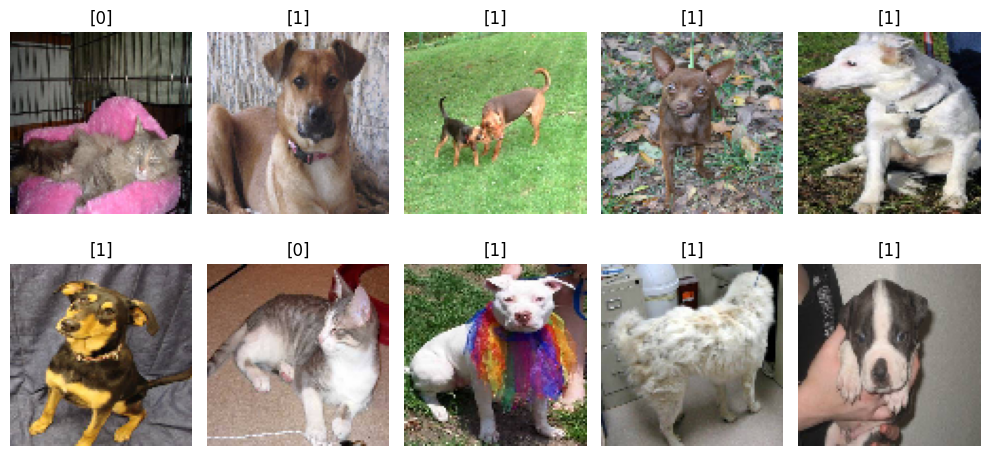

In [ ]:
#TODO<
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
axs = axs.flatten()
for ax in axs:
  ax.axis('off')
  idx = np.random.randint(X_train.shape[0])
  ax.imshow(X_train[idx])
  ax.set_title(y_train[idx])
plt.tight_layout()
plt.show()
#TODO>

**(1)** Train a 2-layer neural network classifier with 128 hidden nodes

Define the structure of the model:

In [ ]:
#TODO<
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(96, 96, 3)) )
model.add(tf.keras.layers.Dense(128, activation='relu') )
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()
#TODO>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 27648)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,539,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,539,330 (13.50 MB)

 Trainable params: 3,539,330 (13.50 MB)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [ ]:
#TODO<
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
#TODO>

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5027 - loss: 2880.4304
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5126 - loss: 0.8321
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5177 - loss: 0.6931
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4878 - loss: 0.6932
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4946 - loss: 0.6932


Evaluate the model on the test set:

In [ ]:
#TODO<
model.evaluate(X_test, y_test, verbose=2)
#TODO>

32/32 - 0s - 11ms/step - accuracy: 0.5000 - loss: 0.6932


[0.6931514143943787, 0.5]

What do you conclude? --> *the results are really poor*

**(2)** Train a simple convolutional neural network classifier

Define a model with 2 convolutional layers separated with a maxpooling layer:

In [ ]:
#TODO<
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()
#TODO>

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │          32,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,186 (1.61 MB)

 Trainable params: 421,186 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [ ]:
#TODO<
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
#TODO>

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.5111 - loss: 29.9709
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 631ms/step - accuracy: 0.5794 - loss: 0.6566
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 609ms/step - accuracy: 0.6701 - loss: 0.6026
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 630ms/step - accuracy: 0.7191 - loss: 0.5416
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 0.7763 - loss: 0.4690


Experiment with different networks by changing the number of channels in the layers and adding/removing layers.

Evaluate the model on the test set:

In [ ]:
#TODO<
model.evaluate(X_test, y_test, verbose=2)
#TODO>

32/32 - 5s - 157ms/step - accuracy: 0.6140 - loss: 0.7230


[0.7229831218719482, 0.6140000224113464]

What do you conclude?